<a href="https://colab.research.google.com/github/dsanjai5/Dsan/blob/main/NM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import joblib

In [ ]:
# Load dataset
url = 'city_day.csv'
data = pd.read_csv(url)

# Display the first few rows
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
# Fill missing values only in numeric columns with their mean
numeric_cols = data.select_dtypes(include=['number']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# If you want to drop any remaining rows with missing values (optional)
data = data.dropna()

In [ ]:
print(data.columns.tolist())
# Suppose your DataFrame columns are:
# ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'Temp', 'Hum', 'Wind']

features = ['City','Date','PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']
# Use the exact names as shown in print(data.columns.tolist())
data.columns = data.columns.str.strip()
X = data[features]
Y = data['AQI']

['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [ ]:
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

In [ ]:
# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest R²:", r2_score(y_test, y_pred_rf))


Random Forest R²: 0.9041193285005772


In [ ]:
# Build the neural network model
nn_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile and train the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')
nn_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predict and evaluate
y_pred_nn = nn_model.predict(X_test_scaled)
print("Neural Network R²:", r2_score(y_test, y_pred_nn))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 36489.1016 - val_loss: 4251.2363
Epoch 2/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3772.5208 - val_loss: 2673.6631
Epoch 3/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2930.9441 - val_loss: 2474.6860
Epoch 4/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3249.5500 - val_loss: 2370.7715
Epoch 5/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2765.3423 - val_loss: 2312.2329
Epoch 6/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2499.9150 - val_loss: 2247.8650
Epoch 7/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2573.9619 - val_loss: 2148.5969
Epoch 8/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2122.1240 - val_loss: 2174.1711
Epoch 9/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2449.7014 - val_loss: 2137.5635
Epoch 10/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2513.3013 - val_loss: 2124.1221
Epoch 11/50
497/497 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 2229.2561 - val_l

In [ ]:
import xgboost as xgb

# Initialize and train the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))


XGBoost R²: 0.8872676097712138


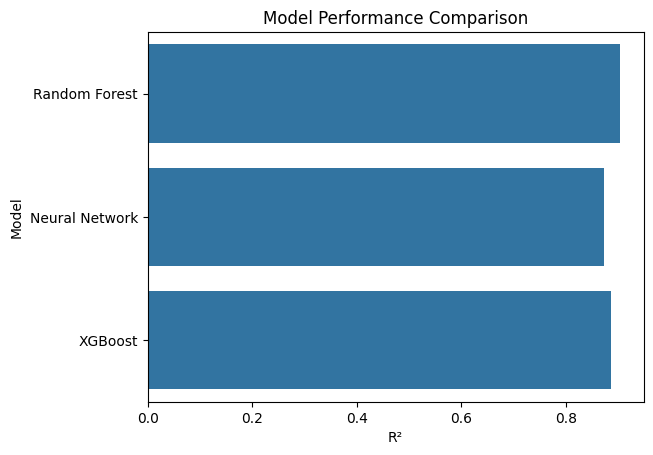

In [ ]:
# Calculate R² for each model
r2_rf = r2_score(y_test, y_pred_rf)
r2_nn = r2_score(y_test, y_pred_nn)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Create a DataFrame to compare results
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Neural Network', 'XGBoost'],
    'R²': [r2_rf, r2_nn, r2_xgb]
})

# Plot the comparison
sns.barplot(x='R²', y='Model', data=model_comparison)
plt.title('Model Performance Comparison')
plt.show()


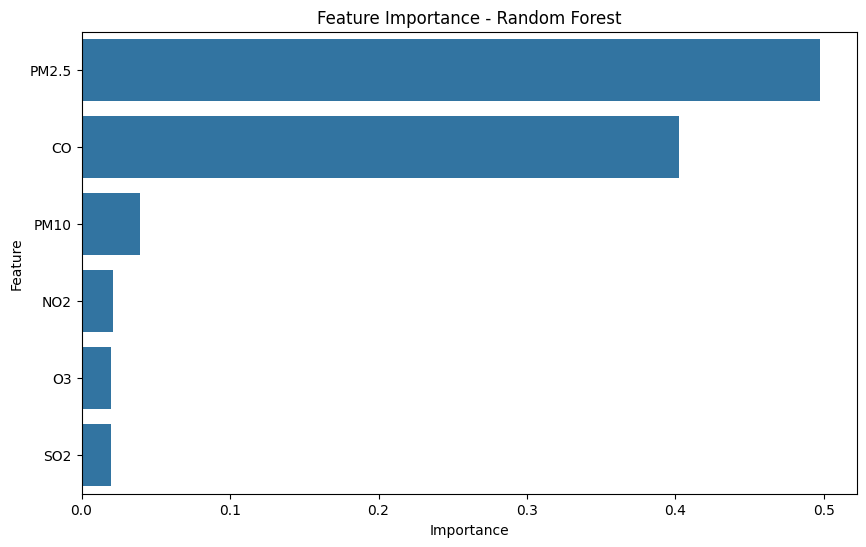

In [ ]:
importances = rf_model.feature_importances_
features = X_train_numeric.columns
feature_importance=pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance - Random Forest')
plt.show()

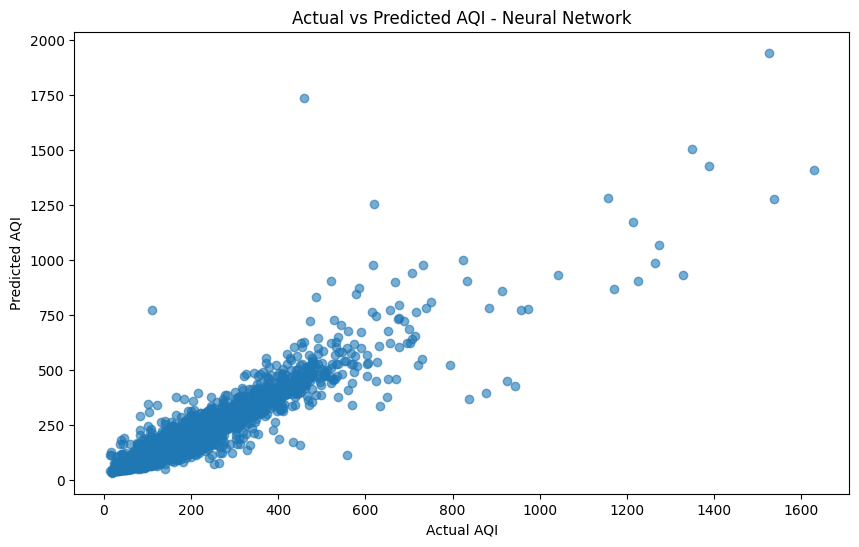

In [ ]:
# Plot actual vs predicted AQI
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn, alpha=0.6)
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI - Neural Network')
plt.show()